# Precipitation in the Columbia River Basin on Feb 10th: 1990's Edition

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Reading in the data

In [2]:
df = pd.read_csv('output/merged.csv')

In [3]:
# Checking out the first five rows

df.head()

,Lat,Long,YYYYMMDD,Basin_name,Station_id,Acton_id,Station_name,Elevation,Wteq_amt,Wteq_med,Wteq_amt_pct_med,Wteq_amt_pct_med_flag,Prec_wytd_amt,Prec_wytd_avg,Prec_wytd_pctavg,Prec_wytd_pct_avg_flag,
0,48.566667,-115.450000,19900210.0,KOOTENAI RIVER IN MONTANA,311,15A08S,Banfield Mountain,5600,17.2,12.2,141.0,NaN,23.8,17.8,134.0,NaN,NaN
1,48.300000,-116.066667,19900210.0,KOOTENAI RIVER IN MONTANA,323,16A08S,Bear Mountain,5400,50.8,38.6,132.0,NaN,69.3,49.5,140.0,NaN,NaN
2,48.983333,-115.816667,19900210.0,KOOTENAI RIVER IN MONTANA,918,15A05S,Garver Creek,4250,8.1,6.9,117.0,NaN,-999.0,12.9,NaN,-997.0,NaN
3,48.916667,-114.766667,19900210.0,KOOTENAI RIVER IN MONTANA,500,14A11S,Grave Creek,4300,11.9,11.4,104.0,NaN,32.8,22.8,144.0,NaN,NaN
4,48.300000,-114.833333,19900210.0,KOOTENAI RIVER IN MONTANA,510,14A14S,Hand Creek,5035,9.8,7.8,126.0,NaN,18.6,11.7,159.0,NaN,NaN


In [4]:
# Checking rows and columns

df.shape

(3030, 17)

### Cleaning the data

In [5]:
# Checking for null values

df.isnull().sum()

Lat                        240
Long                       240
YYYYMMDD                   240
Basin_name                 240
Station_id                   0
Acton_id                   240
Station_name               240
Elevation                    0
Wteq_amt                   240
Wteq_med                   240
Wteq_amt_pct_med           224
Wteq_amt_pct_med_flag     2806
Prec_wytd_amt              240
Prec_wytd_avg              240
Prec_wytd_pctavg           139
Prec_wytd_pct_avg_flag    2891
                          2800
dtype: int64

In [6]:
# Checking the untitled column
df[' ']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3025    NaN
3026    NaN
3027    NaN
3028    NaN
3029    NaN
Name:  , Length: 3030, dtype: object

In [7]:
# Checking where the values are not null
df[df[' '].isnull() == False][' ']

8        
26       
42       
51       
60       
       ..
2964     
2978     
2985     
3007     
3018     
Name:  , Length: 230, dtype: object

In [8]:
# Dropping the untitled column
df.drop(columns = ' ', inplace = True)

In [9]:
# Checking what is going on with the missing values in Lat

df[df['Lat'].isnull() == True]

,Lat,Long,YYYYMMDD,Basin_name,Station_id,Acton_id,Station_name,Elevation,Wteq_amt,Wteq_med,Wteq_amt_pct_med,Wteq_amt_pct_med_flag,Prec_wytd_amt,Prec_wytd_avg,Prec_wytd_pctavg,Prec_wytd_pct_avg_flag
8,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,129.0,NaN,NaN,NaN,140.0,NaN
26,NaN,NaN,NaN,NaN,FLATHEAD RIVER BASIN,NaN,NaN,Basin Index (%),NaN,NaN,132.0,NaN,NaN,NaN,142.0,NaN
42,NaN,NaN,NaN,NaN,UPPER CLARK FORK RIVER BASIN,NaN,NaN,Basin Index (%),NaN,NaN,113.0,NaN,NaN,NaN,120.0,NaN
51,NaN,NaN,NaN,NaN,BITTERROOT,NaN,NaN,Basin Index (%),NaN,NaN,118.0,NaN,NaN,NaN,115.0,NaN
60,NaN,NaN,NaN,NaN,LOWER CLARK FORK RIVER BASIN,NaN,NaN,Basin Index (%),NaN,NaN,134.0,NaN,NaN,NaN,138.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,NaN,NaN,NaN,NaN,"DESCHUTES, CROOKED, JOHN DAY",NaN,NaN,Basin Index (%),NaN,NaN,175.0,NaN,NaN,NaN,132.0,NaN
2985,NaN,NaN,NaN,NaN,"LOWER COLUMBIA, HOOD RIVER",NaN,NaN,Basin Index (%),NaN,NaN,138.0,NaN,NaN,NaN,133.0,NaN
3007,NaN,NaN,NaN,NaN,WILLAMETTE,NaN,NaN,Basin Index (%),NaN,NaN,192.0,NaN,NaN,NaN,138.0,NaN
3018,NaN,NaN,NaN,NaN,"LEWIS, COWLITZ",NaN,NaN,Basin Index (%),NaN,NaN,191.0,NaN,NaN,NaN,148.0,NaN


In [10]:
# It looks like a lot of those 240 null values are all missing from the same rows, it also looks like the only
# useful information in those rows is the current snow water equivalent as percent of median and water year to 
# date precipitation as percent of average.

In [11]:
# Checking the first station that showed up in the missing rows to see if any of the reports are useful

df[df['Station_id'] == 'KOOTENAI RIVER IN MONTANA']

,Lat,Long,YYYYMMDD,Basin_name,Station_id,Acton_id,Station_name,Elevation,Wteq_amt,Wteq_med,Wteq_amt_pct_med,Wteq_amt_pct_med_flag,Prec_wytd_amt,Prec_wytd_avg,Prec_wytd_pctavg,Prec_wytd_pct_avg_flag
8,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,129.0,NaN,NaN,NaN,140.0,NaN
311,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,142.0,NaN,NaN,NaN,147.0,NaN
614,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,95.0,NaN,NaN,NaN,79.0,NaN
917,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,86.0,NaN,NaN,NaN,71.0,NaN
1220,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,72.0,NaN,NaN,NaN,60.0,NaN
1523,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,114.0,NaN,NaN,NaN,109.0,NaN
1826,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,127.0,NaN,NaN,NaN,161.0,NaN
2129,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,162.0,NaN,NaN,NaN,132.0,NaN
2432,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,91.0,NaN,NaN,NaN,83.0,NaN
2735,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,163.0,NaN,NaN,NaN,131.0,NaN


In [12]:
# It looks like every report from this station is missing the same values.

In [13]:
# Double checking data types

df.dtypes

Lat                       float64
Long                      float64
YYYYMMDD                  float64
Basin_name                 object
Station_id                 object
Acton_id                   object
Station_name               object
Elevation                  object
Wteq_amt                  float64
Wteq_med                  float64
Wteq_amt_pct_med          float64
Wteq_amt_pct_med_flag     float64
Prec_wytd_amt             float64
Prec_wytd_avg             float64
Prec_wytd_pctavg          float64
Prec_wytd_pct_avg_flag    float64
dtype: object

In [14]:
# The 'YYYMMDD' column needs to be set to a datetime

df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

In [15]:
# Making sure the type changed to datetime object

df.dtypes

Lat                              float64
Long                             float64
YYYYMMDD                  datetime64[ns]
Basin_name                        object
Station_id                        object
Acton_id                          object
Station_name                      object
Elevation                         object
Wteq_amt                         float64
Wteq_med                         float64
Wteq_amt_pct_med                 float64
Wteq_amt_pct_med_flag            float64
Prec_wytd_amt                    float64
Prec_wytd_avg                    float64
Prec_wytd_pctavg                 float64
Prec_wytd_pct_avg_flag           float64
dtype: object

In [16]:
# Setting the index to be the datetime

df.set_index('YYYYMMDD', inplace = True)

In [17]:
# Sorting the data by date

df.sort_index(inplace = True)

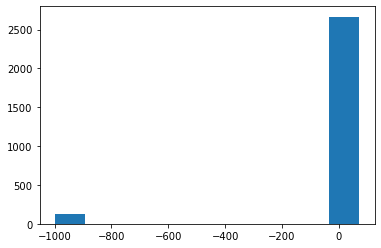

In [18]:
# Trying to get an initial look at some distribution

plt.hist(df['Wteq_amt']);

In [19]:
# Checking the values in the dataset

df.describe()

,Lat,Long,Wteq_amt,Wteq_med,Wteq_amt_pct_med,Wteq_amt_pct_med_flag,Prec_wytd_amt,Prec_wytd_avg,Prec_wytd_pctavg,Prec_wytd_pct_avg_flag
count,2790.000000,2790.000000,2790.000000,2790.000000,2806.000000,224.0,2790.000000,2790.000000,2891.000000,139.0
mean,45.436141,-116.455376,-27.556559,-31.321505,110.602281,-997.0,-20.403728,6.551613,107.709097,-997.0
std,1.865060,3.543578,209.865561,213.899963,45.238525,0.0,216.351167,136.567327,34.950773,0.0
min,41.233333,-123.366667,-999.000000,-998.000000,0.000000,-997.0,-999.000000,-998.000000,32.000000,-997.0
25%,43.950000,-119.933333,8.300000,9.200000,81.000000,-997.0,12.300000,13.800000,81.000000,-997.0
50%,45.183333,-115.700000,14.000000,13.400000,103.000000,-997.0,20.300000,21.000000,103.000000,-997.0
75%,47.000000,-113.950000,22.875000,20.700000,137.000000,-997.0,33.600000,31.000000,131.000000,-997.0
max,48.983333,-110.050000,71.900000,47.600000,594.000000,-997.0,160.500000,99.400000,234.000000,-997.0


In [20]:
# Some data is entered as negative numbers when they should be null values.
# -997 : Data may not provide valid measure of contitions
# -998 : No normal available
# -999 : Missing data

In [21]:
df['Wteq_amt'].value_counts()

-999.0    124
 8.1       27
 0.0       24
 9.3       23
 7.0       21
         ... 
 58.4       1
 2.4        1
 71.9       1
 45.3       1
 1.6        1
Name: Wteq_amt, Length: 473, dtype: int64

In [22]:
# Replacing the negative values with null values

df.replace(-997.0, np.nan, inplace = True)
df.replace(-998.0, np.nan, inplace = True)
df.replace(-999.0, np.nan, inplace = True)

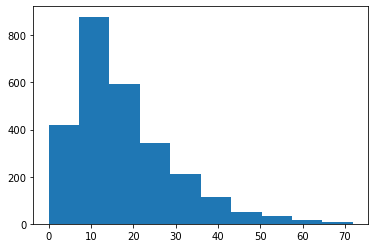

In [23]:
# Double checking the earlier distribution
plt.hist(df['Wteq_amt']);

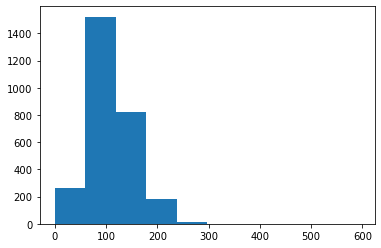

In [24]:
# Initial check of another distribution

plt.hist(df['Wteq_amt_pct_med']);

In [25]:
# Seeing how many null values exist after converting the numbers to null


df.isnull().sum()

Lat                        240
Long                       240
Basin_name                 240
Station_id                   0
Acton_id                   240
Station_name               240
Elevation                    0
Wteq_amt                   364
Wteq_med                   370
Wteq_amt_pct_med           224
Wteq_amt_pct_med_flag     3030
Prec_wytd_amt              369
Prec_wytd_avg              290
Prec_wytd_pctavg           139
Prec_wytd_pct_avg_flag    3030
dtype: int64

In [26]:
# Double checking values in the data

df.describe()

,Lat,Long,Wteq_amt,Wteq_med,Wteq_amt_pct_med,Wteq_amt_pct_med_flag,Prec_wytd_amt,Prec_wytd_avg,Prec_wytd_pctavg,Prec_wytd_pct_avg_flag
count,2790.000000,2790.000000,2666.000000,2660.000000,2806.000000,0.0,2661.000000,2740.000000,2891.000000,0.0
mean,45.436141,-116.455376,17.626857,15.922180,110.602281,NaN,27.036678,24.882847,107.709097,NaN
std,1.865060,3.543578,11.872219,8.405817,45.238525,NaN,19.594281,15.282298,34.950773,NaN
min,41.233333,-123.366667,0.000000,0.000000,0.000000,NaN,2.700000,6.000000,32.000000,NaN
25%,43.950000,-119.933333,9.125000,9.800000,81.000000,NaN,13.400000,14.100000,81.000000,NaN
50%,45.183333,-115.700000,14.650000,14.000000,103.000000,NaN,21.300000,21.100000,103.000000,NaN
75%,47.000000,-113.950000,23.500000,20.900000,137.000000,NaN,34.500000,31.700000,131.000000,NaN
max,48.983333,-110.050000,71.900000,47.600000,594.000000,NaN,160.500000,99.400000,234.000000,NaN


In [27]:
# Checking for any good values in the flag columns

df['Wteq_amt_pct_med_flag'].value_counts()

Series([], Name: Wteq_amt_pct_med_flag, dtype: int64)

In [28]:
df['Prec_wytd_pct_avg_flag'].value_counts()

Series([], Name: Prec_wytd_pct_avg_flag, dtype: int64)

In [29]:
# Dropping columns full of null values (flag columns) as even the values not already nulled represent an invalid
# measure of contitions according to the data dictionary.

df.drop(columns = ['Wteq_amt_pct_med_flag', 'Prec_wytd_pct_avg_flag'], inplace = True)

In [30]:
df.isnull().sum()

Lat                 240
Long                240
Basin_name          240
Station_id            0
Acton_id            240
Station_name        240
Elevation             0
Wteq_amt            364
Wteq_med            370
Wteq_amt_pct_med    224
Prec_wytd_amt       369
Prec_wytd_avg       290
Prec_wytd_pctavg    139
dtype: int64

In [31]:
# Checking for stations with no values for current snow water

df[df['Wteq_amt'].isnull()].groupby('Station_id').mean()

,Lat,Long,Wteq_amt,Wteq_med,Wteq_amt_pct_med,Prec_wytd_amt,Prec_wytd_avg,Prec_wytd_pctavg
Station_id,,,,,,,,
1068,47.166667,-121.416667,NaN,NaN,NaN,NaN,NaN,NaN
1084,45.250000,-123.283333,NaN,NaN,NaN,NaN,NaN,NaN
1144,47.983333,-114.350000,NaN,NaN,NaN,NaN,NaN,NaN
1165,48.200000,-114.516667,NaN,NaN,NaN,NaN,NaN,NaN
346,47.683333,-114.000000,NaN,6.8,NaN,NaN,11.5,NaN
382,43.266667,-115.350000,NaN,9.7,NaN,NaN,12.9,NaN
535,47.533333,-115.783333,NaN,8.9,NaN,44.90,26.6,169.0
549,41.516667,-116.016667,NaN,NaN,NaN,15.95,17.3,92.2
599,46.350000,-121.083333,NaN,14.7,NaN,NaN,20.6,NaN


In [32]:
# Using SimpleImputer to impute values
# imp_med = SimpleImputer(missing_values = np.nan, strategy = 'median')

# List of columns to impute values for
# imp_list = ['wteq_amt', 'wteq_med', 'wteq_amt_pct_med', 'prec_wytd_amt', 'prec_wytd_avg', 'prec_wytd_pctavg']

#for i in range(10):
    #current_year = df[df.index.year == (1990 + i)]
    #for column in current_year.columns:
        #if column in imp_list:
            #imp_med.fit_transform(current_year[column])
            #df[df.index.year == (1990 + i)][column] = current_year[column]        

In [33]:
# Changing the names of the columns to be easier to work with

lower_cols = [column.lower() for column in df.columns]

df.columns = lower_cols
df.head()

,lat,long,basin_name,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
YYYYMMDD,,,,,,,,,,,,,
1990-02-10,48.566667,-115.450000,KOOTENAI RIVER IN MONTANA,311,15A08S,Banfield Mountain,5600,17.2,12.2,141.0,23.8,17.8,134.0
1990-02-10,45.000000,-117.166667,"GRAND RONDE, POWDER, BURNT, IMNAHA",736,17D08S,Schneider Meadows,5400,21.6,22.0,98.0,21.3,26.7,80.0
1990-02-10,45.083333,-117.550000,"GRAND RONDE, POWDER, BURNT, IMNAHA",812,17D07S,Taylor Green,5740,9.8,15.2,64.0,15.0,19.2,78.0
1990-02-10,45.066667,-118.150000,"GRAND RONDE, POWDER, BURNT, IMNAHA",873,18D21S,Wolf Creek,5630,8.4,12.6,67.0,10.2,14.5,70.0
1990-02-10,44.300000,-115.233333,CLEARWATER AND SALMON,312,15E11S,Banner Summit,7040,15.1,16.8,90.0,18.4,21.0,88.0


In [34]:
df.shape

(3030, 13)

In [35]:
df[df.index.isnull() == True]

,lat,long,basin_name,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
YYYYMMDD,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,129.0,NaN,NaN,140.0
NaT,NaN,NaN,NaN,FLATHEAD RIVER BASIN,NaN,NaN,Basin Index (%),NaN,NaN,132.0,NaN,NaN,142.0
NaT,NaN,NaN,NaN,UPPER CLARK FORK RIVER BASIN,NaN,NaN,Basin Index (%),NaN,NaN,113.0,NaN,NaN,120.0
NaT,NaN,NaN,NaN,BITTERROOT,NaN,NaN,Basin Index (%),NaN,NaN,118.0,NaN,NaN,115.0
NaT,NaN,NaN,NaN,LOWER CLARK FORK RIVER BASIN,NaN,NaN,Basin Index (%),NaN,NaN,134.0,NaN,NaN,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,"DESCHUTES, CROOKED, JOHN DAY",NaN,NaN,Basin Index (%),NaN,NaN,175.0,NaN,NaN,132.0
NaT,NaN,NaN,NaN,"LOWER COLUMBIA, HOOD RIVER",NaN,NaN,Basin Index (%),NaN,NaN,138.0,NaN,NaN,133.0
NaT,NaN,NaN,NaN,WILLAMETTE,NaN,NaN,Basin Index (%),NaN,NaN,192.0,NaN,NaN,138.0


In [36]:
# Dropping values with no time to work with

df = df.loc[df.index.notnull()]

In [37]:
df.shape

(2790, 13)

In [38]:
#list of all my features with nulls after dropping those two flag columns and changing all the codes to nulls as well
features_to_fill = ['wteq_amt', 'wteq_med', 'wteq_amt_pct_med', 'prec_wytd_amt', 'prec_wytd_avg', 'prec_wytd_pctavg']

#groups by year, and then fills the nulls with the year's median value
def null_filler(feature):
    return df.groupby(by = df.index)[feature].transform(lambda x: x.fillna(x.median()))

#fills the nulls of every feature in my above list
for feature in features_to_fill:
    df[feature] = null_filler(feature)

In [40]:
df.isnull().sum()

lat                 0
long                0
basin_name          0
station_id          0
acton_id            0
station_name        0
elevation           0
wteq_amt            0
wteq_med            0
wteq_amt_pct_med    0
prec_wytd_amt       0
prec_wytd_avg       0
prec_wytd_pctavg    0
dtype: int64

### Distribution Plots

In [52]:
years = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]

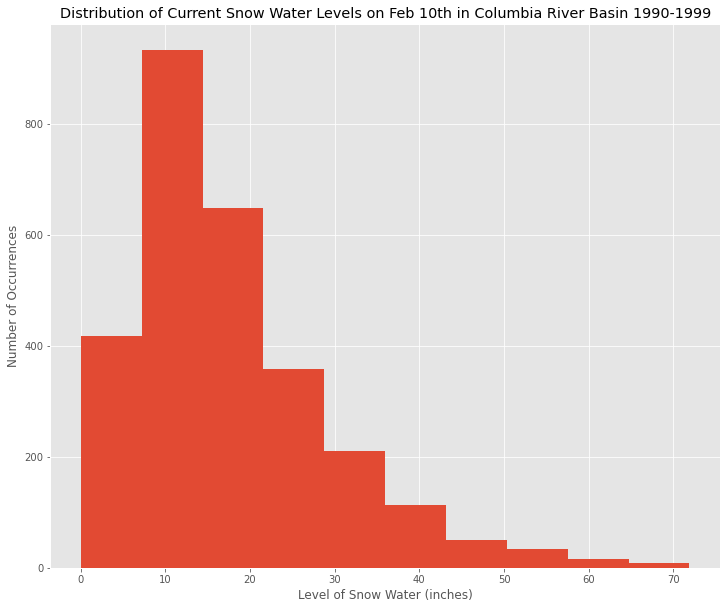

In [44]:
plt.figure(figsize = (12, 10))
plt.hist(df['wteq_amt'])
plt.title('Distribution of Current Snow Water Levels on Feb 10th in Columbia River Basin 1990-1999')
plt.xlabel('Level of Snow Water (inches)')
plt.ylabel('Number of Occurrences')
plt.style.use('ggplot');

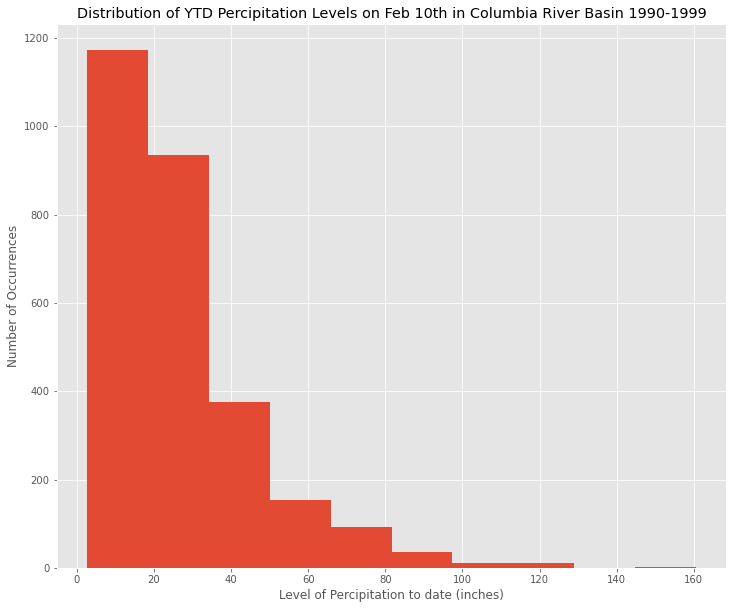

In [46]:
plt.figure(figsize = (12, 10))
plt.hist(df['prec_wytd_amt'])
plt.title('Distribution of YTD Percipitation Levels on Feb 10th in Columbia River Basin 1990-1999')
plt.xlabel('Level of Percipitation to date (inches)')
plt.ylabel('Number of Occurrences')
plt.style.use('ggplot');

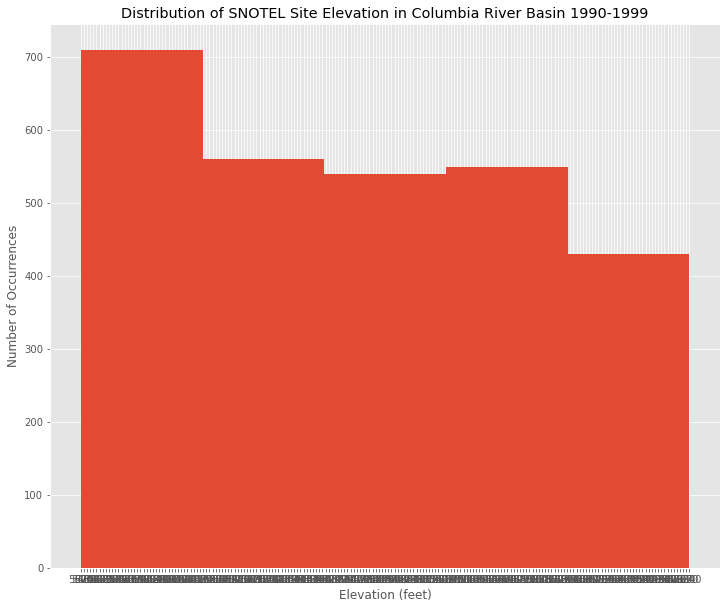

In [47]:
plt.figure(figsize = (12, 10))
plt.hist(df['elevation'], bins = 5)
plt.title('Distribution of SNOTEL Site Elevation in Columbia River Basin 1990-1999')
plt.xlabel('Elevation (feet)')
plt.ylabel('Number of Occurrences')

plt.style.use('ggplot');

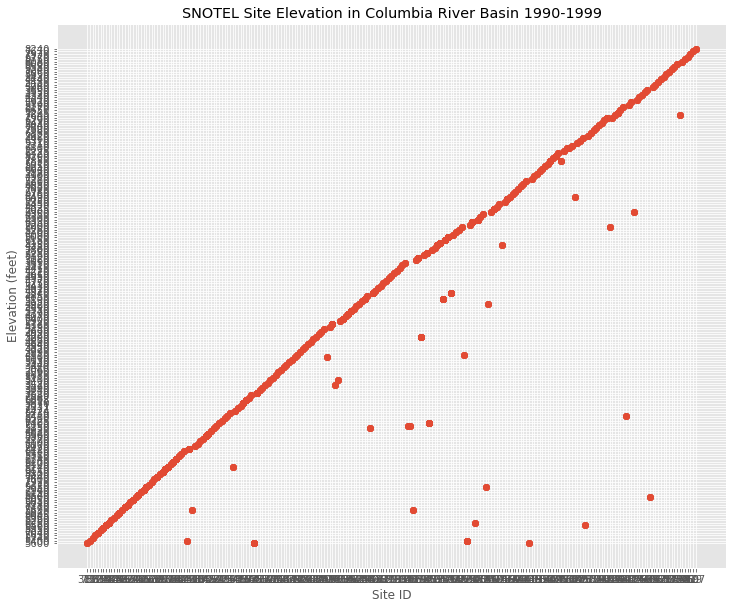

In [48]:
plt.figure(figsize = (12, 10))
plt.scatter(data = df, x = 'station_id', y = 'elevation')
plt.title('SNOTEL Site Elevation in Columbia River Basin 1990-1999')
plt.xlabel('Site ID')
plt.ylabel('Elevation (feet)')

plt.style.use('ggplot');

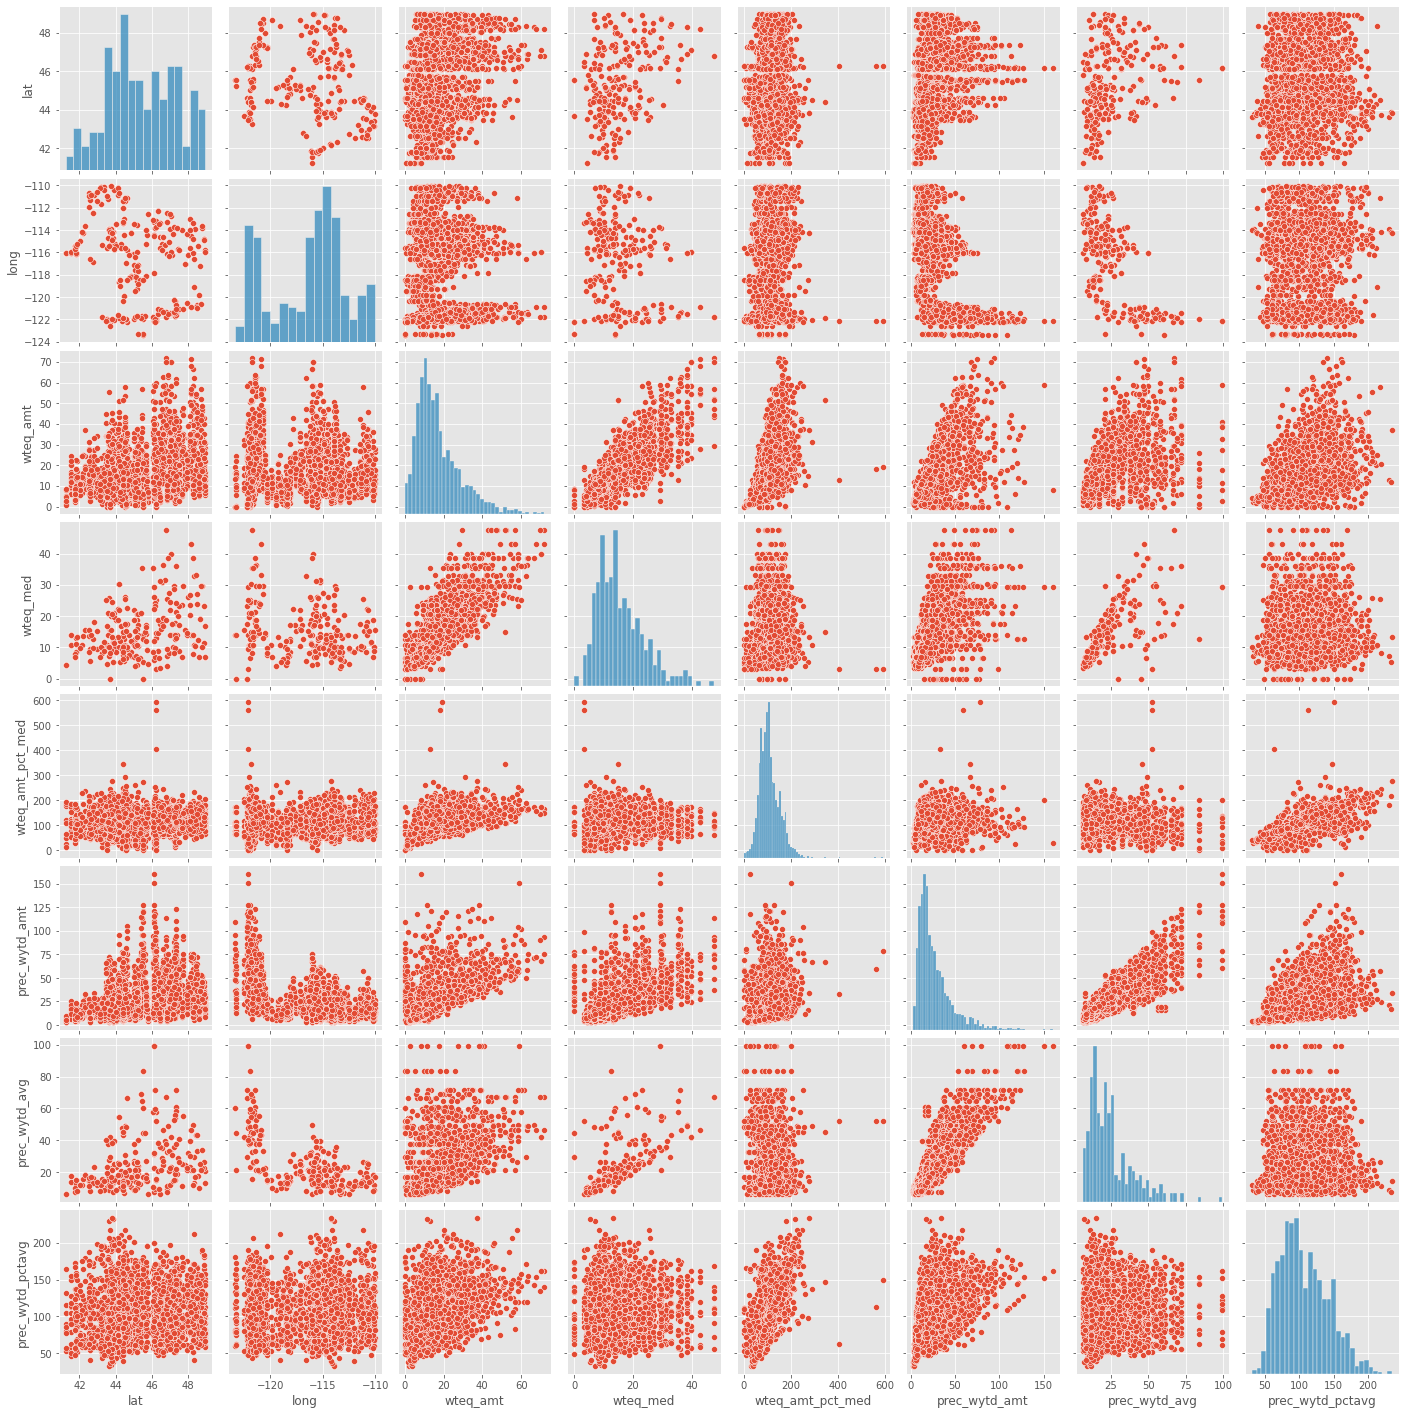

In [49]:
sns.pairplot(df);

In [50]:
df.corr()

,lat,long,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
lat,1.000000,-0.184859,0.295255,0.346959,0.056378,0.273982,0.305668,0.076294
long,-0.184859,1.000000,-0.098577,-0.188494,0.070795,-0.519138,-0.617812,0.003149
wteq_amt,0.295255,-0.098577,1.000000,0.782230,0.548108,0.608773,0.459642,0.448226
wteq_med,0.346959,-0.188494,0.782230,1.000000,0.032200,0.548833,0.634537,0.045614
wteq_amt_pct_med,0.056378,0.070795,0.548108,0.032200,1.000000,0.283348,-0.003841,0.696751
prec_wytd_amt,0.273982,-0.519138,0.608773,0.548833,0.283348,1.000000,0.843699,0.472664
prec_wytd_avg,0.305668,-0.617812,0.459642,0.634537,-0.003841,0.843699,1.000000,0.045258
prec_wytd_pctavg,0.076294,0.003149,0.448226,0.045614,0.696751,0.472664,0.045258,1.000000


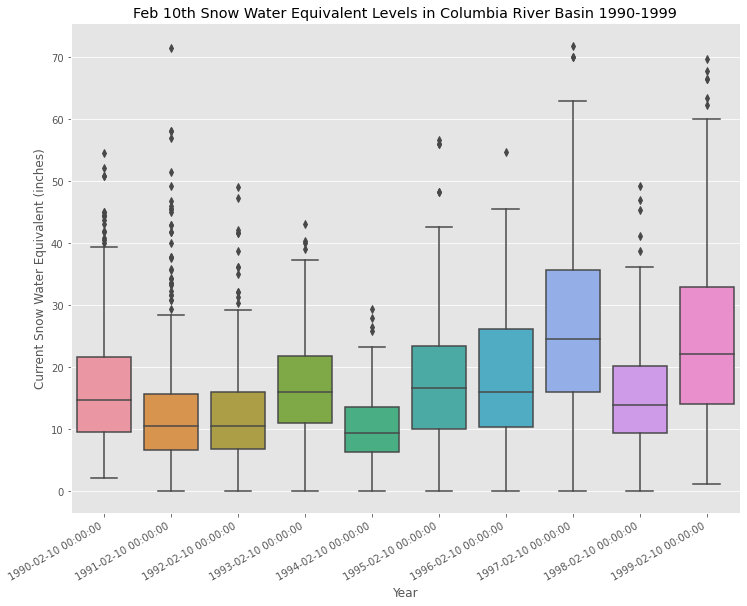

In [58]:
fig = plt.figure(figsize = (12, 10))
sns.boxplot(x = df.index, y = df['wteq_amt'])
plt.title('Feb 10th Snow Water Equivalent Levels in Columbia River Basin 1990-1999')
plt.xlabel('Year')
plt.ylabel('Current Snow Water Equivalent (inches)')
plt.xticks(rotation = 45)
#xtix = ax.get_xticks()
#ax.set_xticks(xtix[::freq])
fig.autofmt_xdate()
plt.style.use('ggplot');

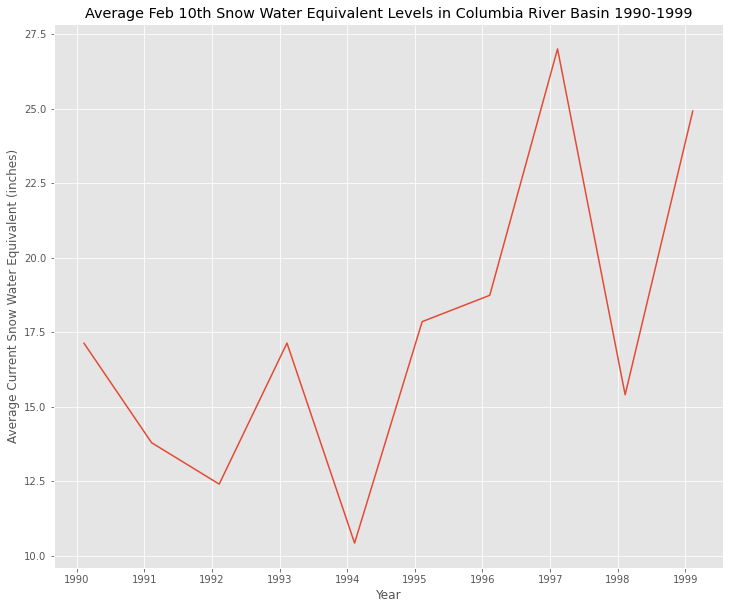

In [61]:
fig = plt.figure(figsize = (12, 10))
plt.plot(df.groupby(df.index)['wteq_amt'].mean())
plt.title('Average Feb 10th Snow Water Equivalent Levels in Columbia River Basin 1990-1999')
plt.xlabel('Year')
plt.ylabel('Average Current Snow Water Equivalent (inches)');

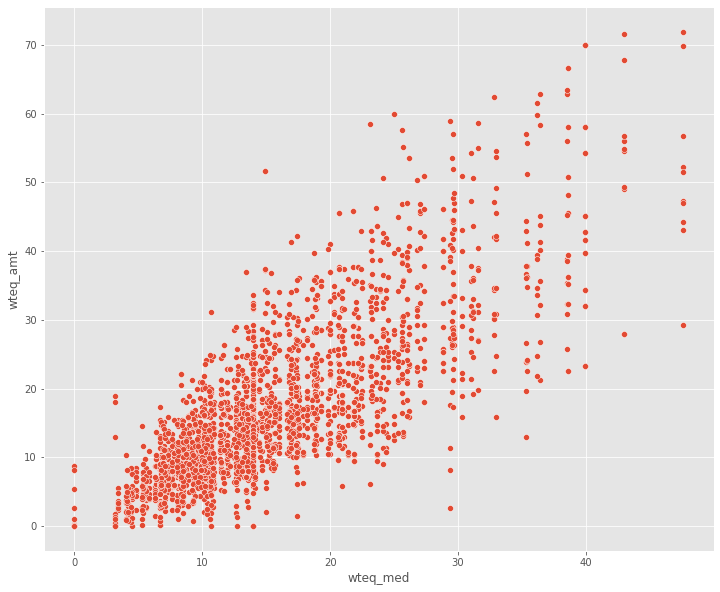

In [65]:
plt.figure( figsize = (12, 10))
sns.scatterplot(x = 'wteq_med', y = 'wteq_amt', data = df);